In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 60)

In [2]:
df = pd.read_csv('/content/Thyroid_Diff.csv')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [3]:
df.duplicated().sum()

19

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   364 non-null    int64 
 1   Gender                364 non-null    object
 2   Smoking               364 non-null    object
 3   Hx Smoking            364 non-null    object
 4   Hx Radiothreapy       364 non-null    object
 5   Thyroid Function      364 non-null    object
 6   Physical Examination  364 non-null    object
 7   Adenopathy            364 non-null    object
 8   Pathology             364 non-null    object
 9   Focality              364 non-null    object
 10  Risk                  364 non-null    object
 11  T                     364 non-null    object
 12  N                     364 non-null    object
 13  M                     364 non-null    object
 14  Stage                 364 non-null    object
 15  Response              364 non-null    object


In [6]:
df = df.rename(columns={'Hx Smoking': 'Smoking History',
                   'Hx Radiothreapy': 'Radiotherapy History',
                   'Pathology': 'Types of Thyroid Cancer (Pathology)',
                   'T': 'Tumor',
                   'N': 'Lymph Nodes',
                   'M': 'Cancer Metastasis',
                  'Response' : 'Treatment Response'})
df.head()

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


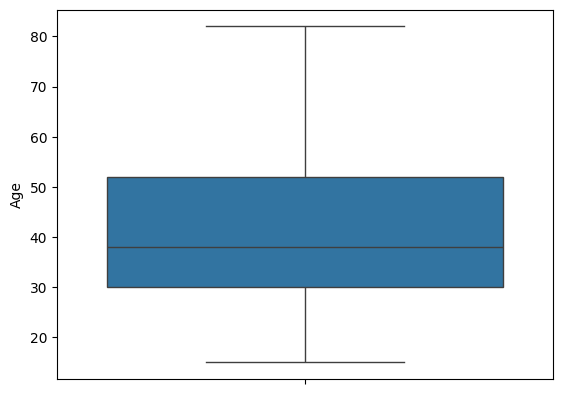

In [9]:
sns.boxplot(df['Age'])
plt.show()

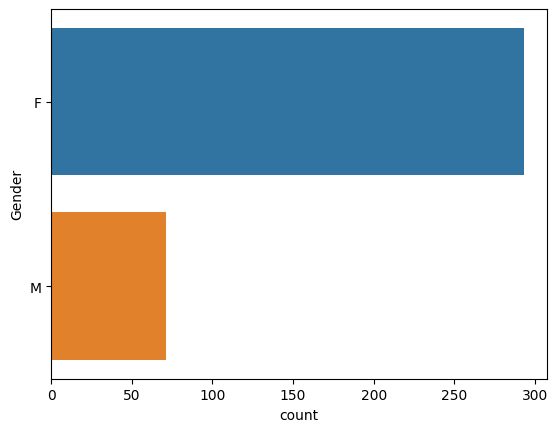

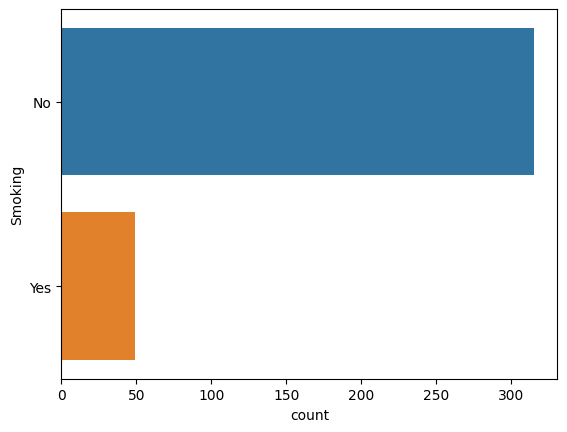

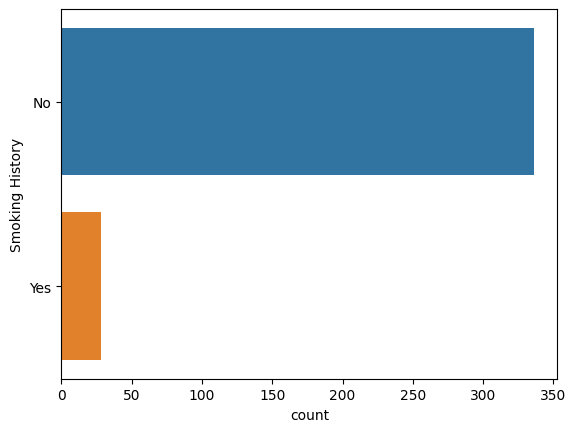

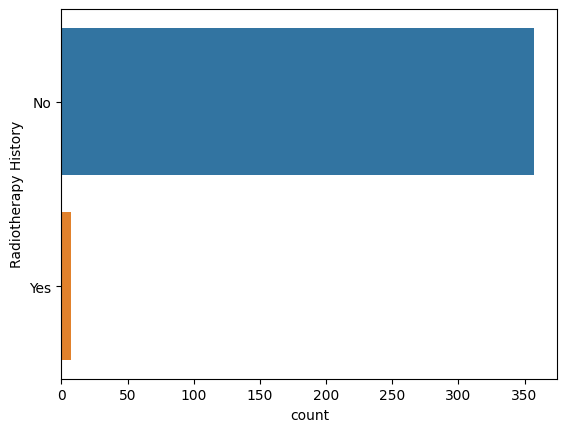

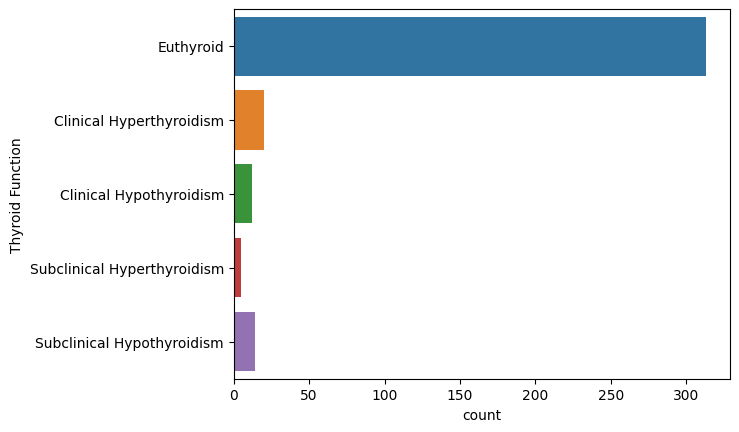

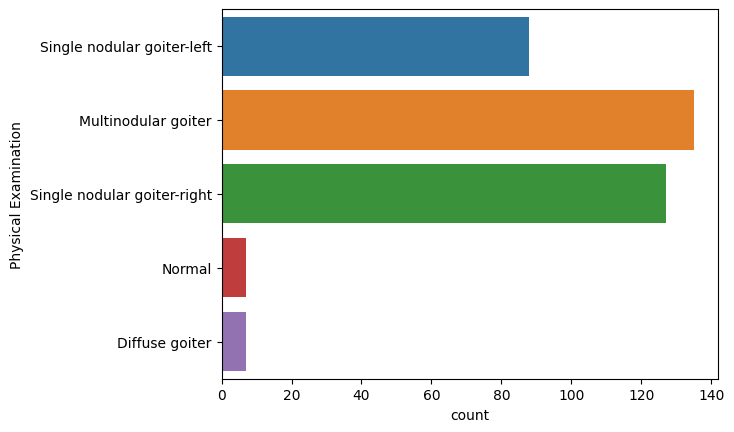

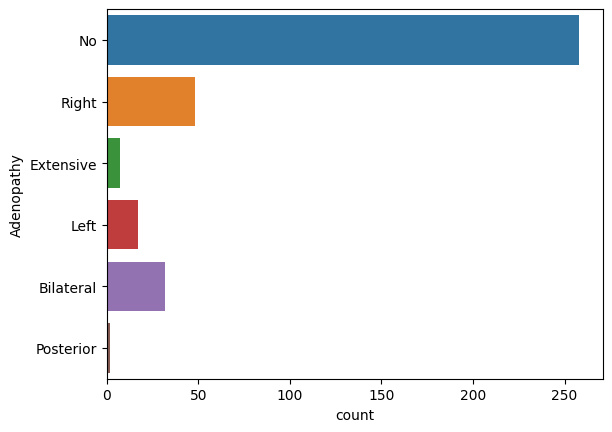

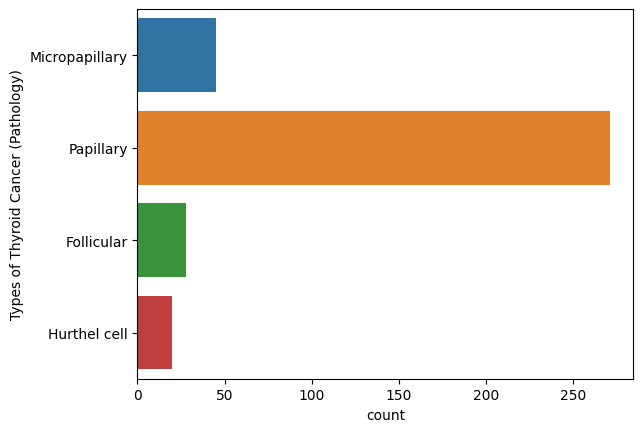

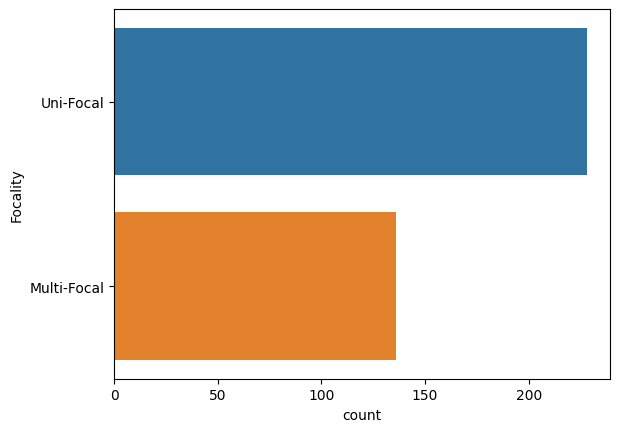

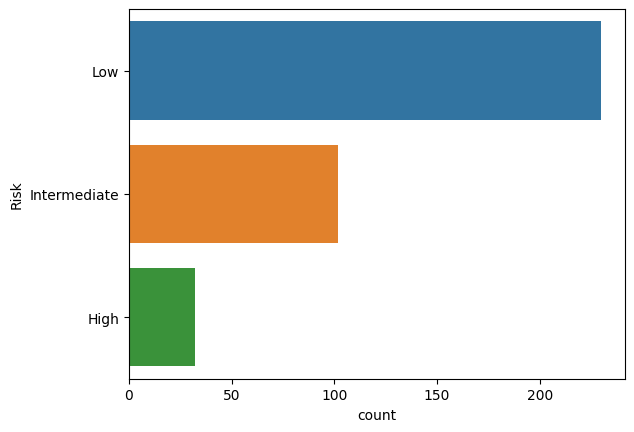

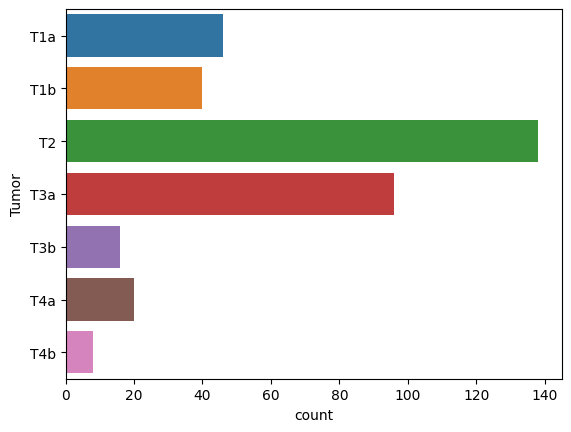

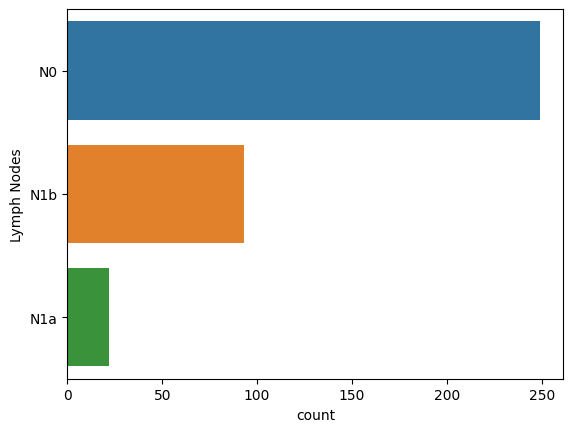

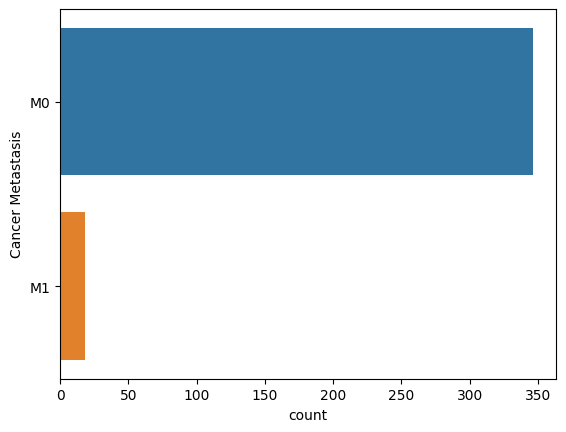

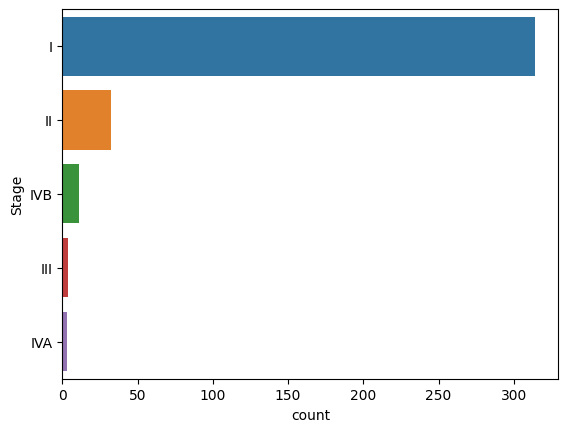

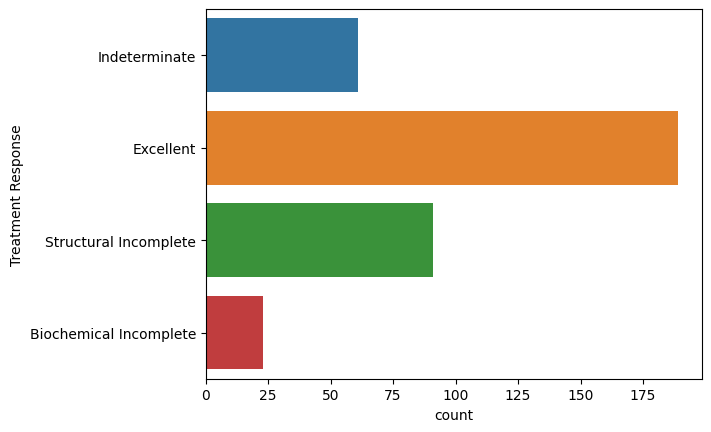

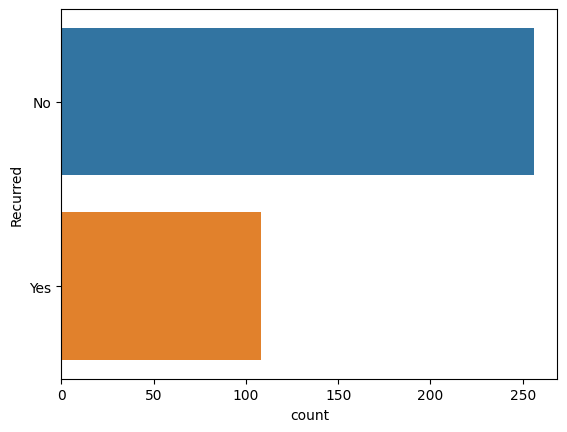

In [14]:
for col in df.iloc[:, 1:].columns:
  sns.countplot(y = col, data = df, hue = col)
  plt.show()

In [16]:
recurred_counts = df['Recurred'].value_counts(normalize = True)
recurred_counts

,proportion
Recurred,
No,0.703297
Yes,0.296703


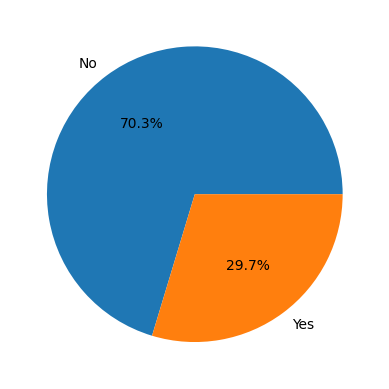

In [17]:
plt.pie(recurred_counts, labels = recurred_counts.index, autopct = '%1.1f%%')
plt.show()

In [18]:
df.head()

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


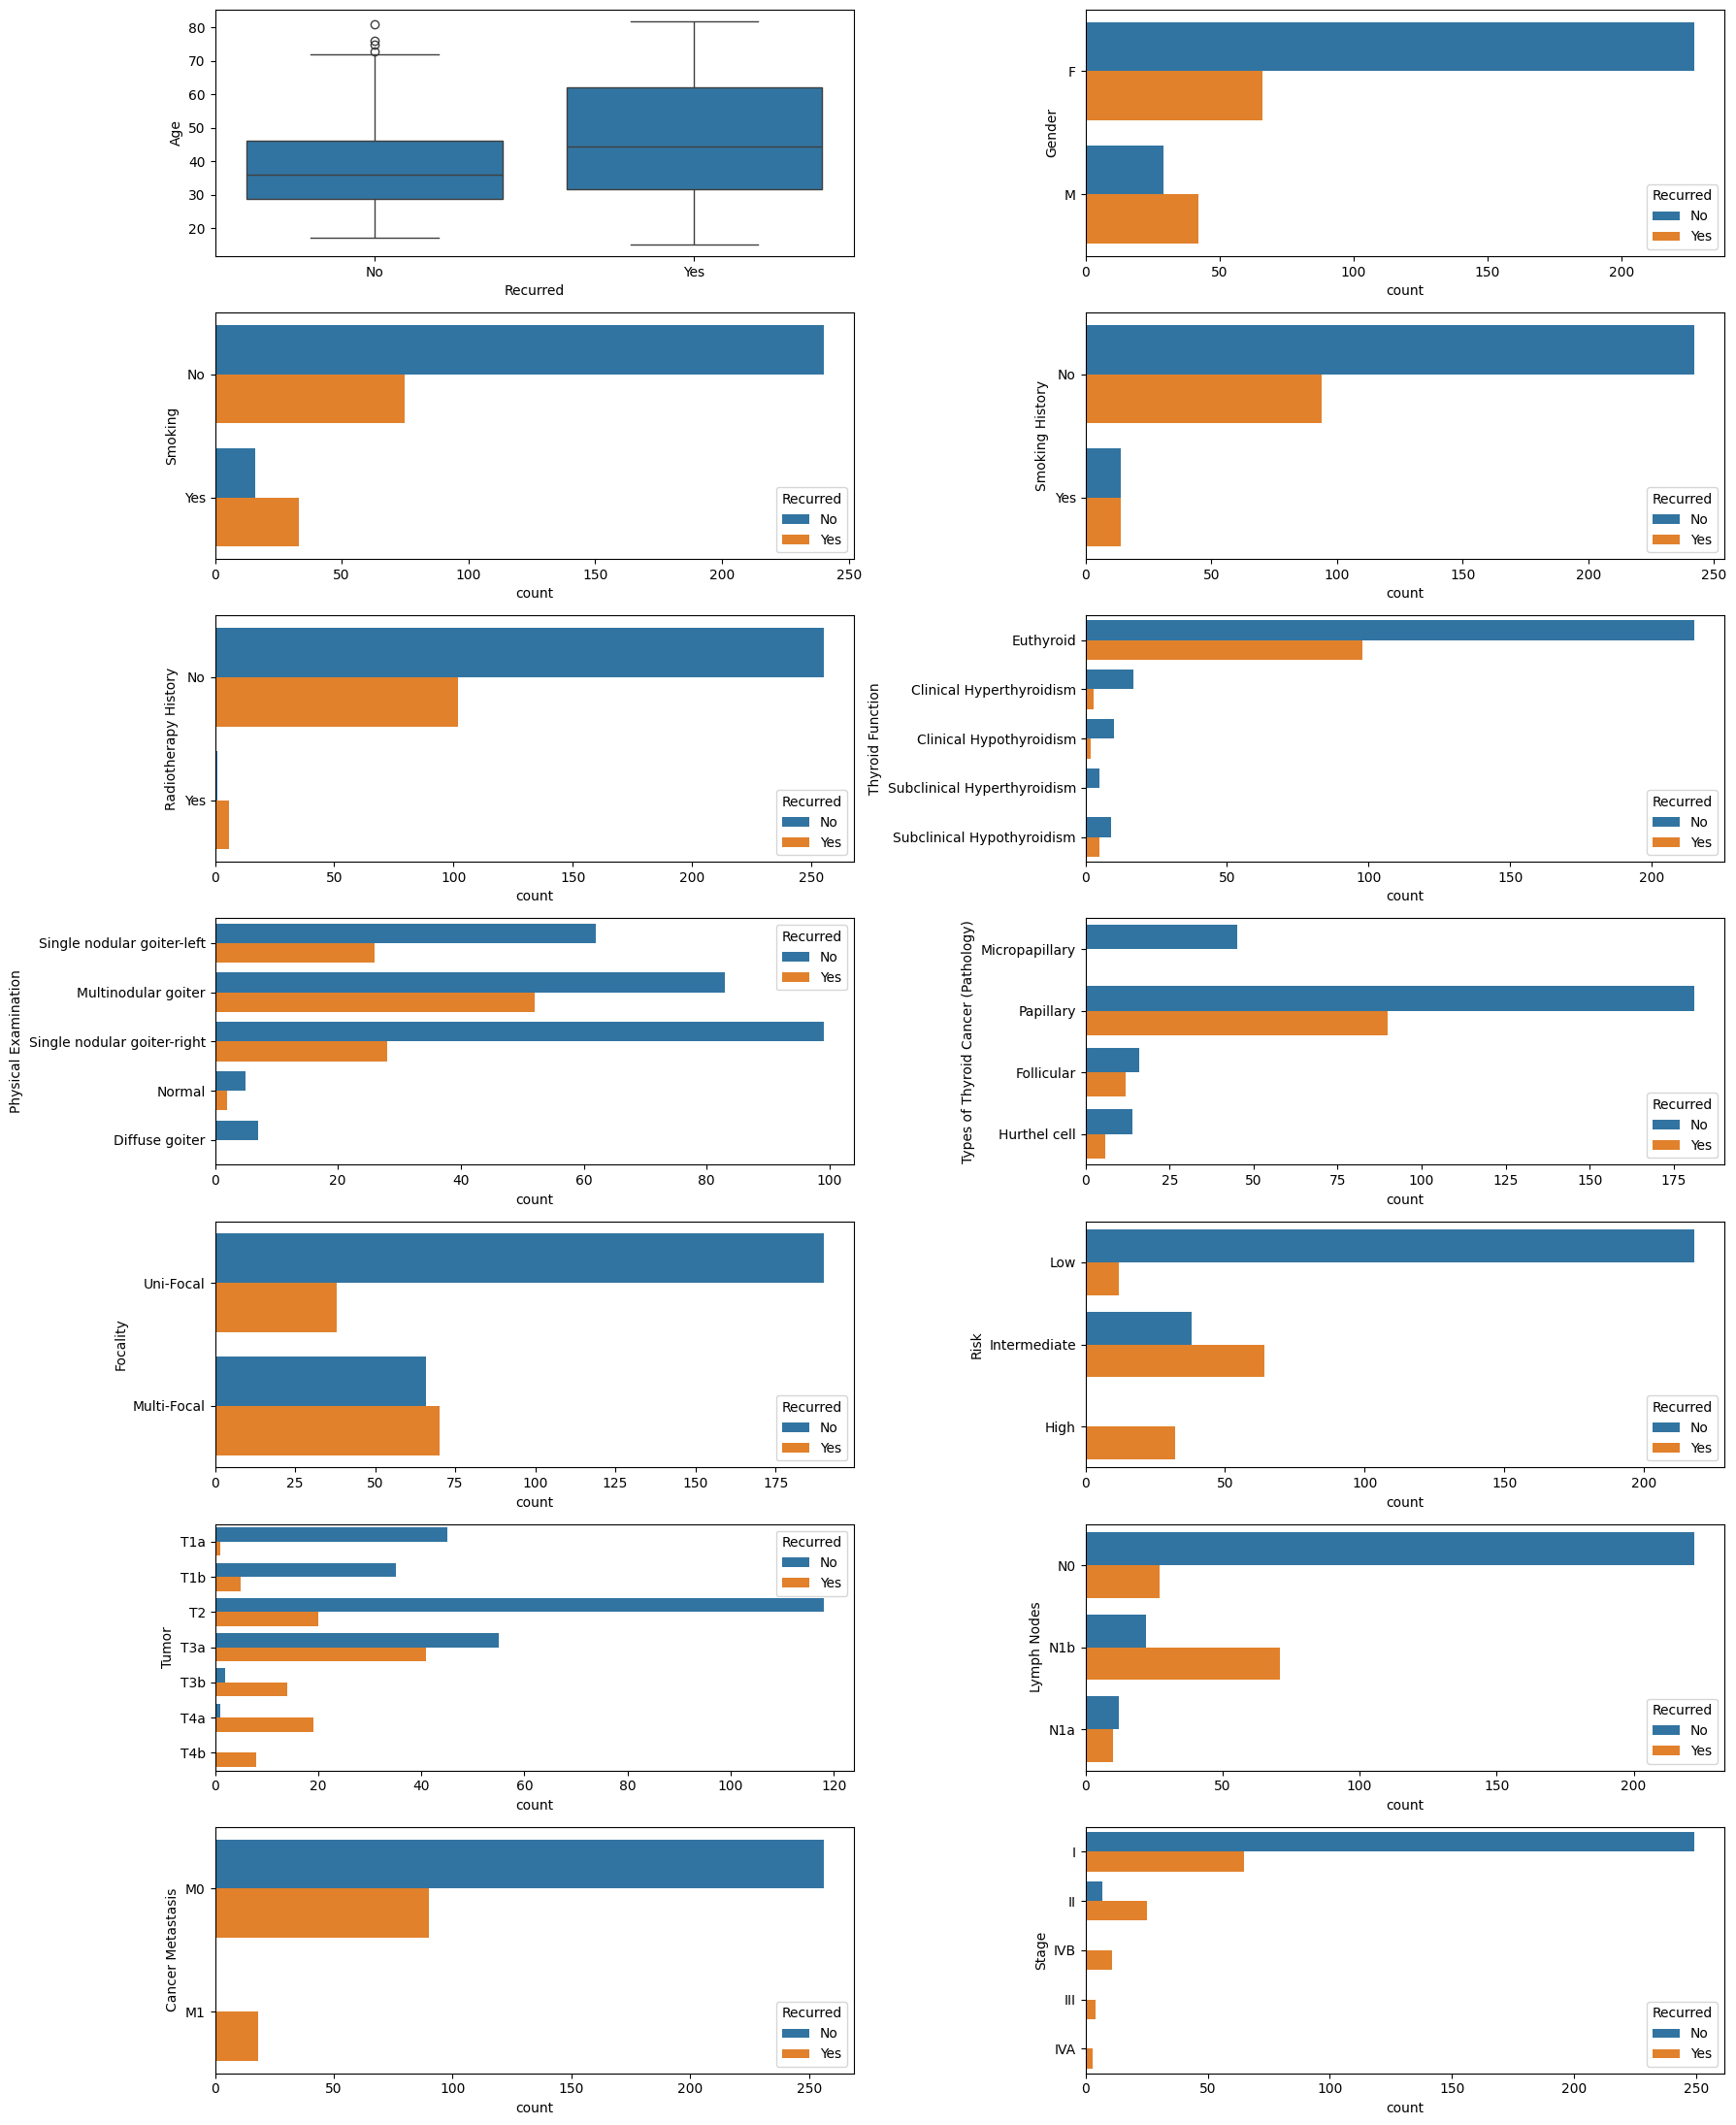

In [24]:
fig, axes = plt.subplots(7, 2, figsize=(18, 22))

sns.boxplot(x='Recurred', y='Age', data=df, ax=axes[0, 0])
sns.countplot(y ='Gender', data=df, hue='Recurred', ax=axes[0, 1])
sns.countplot(y='Smoking', data=df, hue='Recurred', ax=axes[1, 0])
sns.countplot(y='Smoking History', data=df, hue='Recurred', ax=axes[1, 1])
sns.countplot(y='Radiotherapy History', data=df, hue='Recurred', ax=axes[2, 0])
sns.countplot(y='Thyroid Function', data=df, hue='Recurred', ax=axes[2, 1])
sns.countplot(y='Physical Examination', data=df, hue='Recurred', ax=axes[3, 0])
sns.countplot(y='Types of Thyroid Cancer (Pathology)', data=df, hue='Recurred', ax=axes[3, 1])
sns.countplot(y='Focality', data=df, hue='Recurred', ax=axes[4, 0])
sns.countplot(y='Risk', data=df, hue='Recurred', ax=axes[4, 1])
sns.countplot(y='Tumor', data=df, hue='Recurred', ax=axes[5, 0])
sns.countplot(y='Lymph Nodes', data=df, hue='Recurred', ax=axes[5, 1])
sns.countplot(y='Cancer Metastasis', data=df, hue='Recurred', ax=axes[6, 0])
sns.countplot(y='Stage', data=df, hue='Recurred', ax=axes[6, 1])

plt.tight_layout()
plt.show()


In [25]:
df.head()

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [28]:
cat_columns = df.select_dtypes(include = 'object').drop(columns = 'Recurred').columns.tolist()
cat_columns

['Gender',
 'Smoking',
 'Smoking History',
 'Radiotherapy History',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Types of Thyroid Cancer (Pathology)',
 'Focality',
 'Risk',
 'Tumor',
 'Lymph Nodes',
 'Cancer Metastasis',
 'Stage',
 'Treatment Response']

In [29]:
from scipy.stats import chi2_contingency


for col in cat_columns:

  table = pd.crosstab(df[col], df['Recurred'])

  chi2, p_value, dof, expected = chi2_contingency(table)

  if p_value < 0.05:
    print(f"There is significant association between Recurred and {col}")
  else:
    print(f"There is no significant association between Recurred and {col}")
  print()
  print()

There is significant association between Recurred and Gender


There is significant association between Recurred and Smoking


There is significant association between Recurred and Smoking History


There is significant association between Recurred and Radiotherapy History


There is no significant association between Recurred and Thyroid Function


There is significant association between Recurred and Physical Examination


There is significant association between Recurred and Adenopathy


There is significant association between Recurred and Types of Thyroid Cancer (Pathology)


There is significant association between Recurred and Focality


There is significant association between Recurred and Risk


There is significant association between Recurred and Tumor


There is significant association between Recurred and Lymph Nodes


There is significant association between Recurred and Cancer Metastasis


There is significant association between Recurred and Stage


There is significant

In [30]:
df.head()

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [31]:
df = pd.get_dummies(df, columns = cat_columns, dtype = int)
df.head()

,Age,Recurred,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Smoking History_No,Smoking History_Yes,Radiotherapy History_No,Radiotherapy History_Yes,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Diffuse goiter,Physical Examination_Multinodular goiter,Physical Examination_Normal,Physical Examination_Single nodular goiter-left,Physical Examination_Single nodular goiter-right,Adenopathy_Bilateral,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Types of Thyroid Cancer (Pathology)_Follicular,Types of Thyroid Cancer (Pathology)_Hurthel cell,Types of Thyroid Cancer (Pathology)_Micropapillary,Types of Thyroid Cancer (Pathology)_Papillary,Focality_Multi-Focal,Focality_Uni-Focal,Risk_High,Risk_Intermediate,Risk_Low,Tumor_T1a,Tumor_T1b,Tumor_T2,Tumor_T3a,Tumor_T3b,Tumor_T4a,Tumor_T4b,Lymph Nodes_N0,Lymph Nodes_N1a,Lymph Nodes_N1b,Cancer Metastasis_M0,Cancer Metastasis_M1,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Treatment Response_Biochemical Incomplete,Treatment Response_Excellent,Treatment Response_Indeterminate,Treatment Response_Structural Incomplete
0,27,No,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
1,34,No,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
2,30,No,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
3,62,No,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
4,62,No,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0


In [33]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Recurred'] = encoder.fit_transform(df['Recurred'])
df.head()

,Age,Recurred,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Smoking History_No,Smoking History_Yes,Radiotherapy History_No,Radiotherapy History_Yes,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Diffuse goiter,Physical Examination_Multinodular goiter,Physical Examination_Normal,Physical Examination_Single nodular goiter-left,Physical Examination_Single nodular goiter-right,Adenopathy_Bilateral,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Types of Thyroid Cancer (Pathology)_Follicular,Types of Thyroid Cancer (Pathology)_Hurthel cell,Types of Thyroid Cancer (Pathology)_Micropapillary,Types of Thyroid Cancer (Pathology)_Papillary,Focality_Multi-Focal,Focality_Uni-Focal,Risk_High,Risk_Intermediate,Risk_Low,Tumor_T1a,Tumor_T1b,Tumor_T2,Tumor_T3a,Tumor_T3b,Tumor_T4a,Tumor_T4b,Lymph Nodes_N0,Lymph Nodes_N1a,Lymph Nodes_N1b,Cancer Metastasis_M0,Cancer Metastasis_M1,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Treatment Response_Biochemical Incomplete,Treatment Response_Excellent,Treatment Response_Indeterminate,Treatment Response_Structural Incomplete
0,27,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
1,34,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
2,30,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
3,62,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
4,62,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0


In [34]:
X = df.drop(columns = 'Recurred')
y = df['Recurred']

In [37]:
X.shape

(364, 55)

In [35]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X, y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending = False)

,0
Treatment Response_Structural Incomplete,0.378071
Treatment Response_Excellent,0.274717
Risk_Low,0.245124
Lymph Nodes_N1b,0.212002
Adenopathy_No,0.186797
Lymph Nodes_N0,0.167412
Stage_I,0.127457
Risk_High,0.110327
Risk_Intermediate,0.095795
Tumor_T4a,0.080794


In [36]:
selected_features = mutual_info[mutual_info > 0].index.tolist()
X_selected = X[selected_features]

In [38]:
X_selected.shape

(364, 43)

In [39]:
X_selected.head()

,Age,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Smoking History_No,Radiotherapy History_No,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Subclinical Hyperthyroidism,Physical Examination_Diffuse goiter,Physical Examination_Multinodular goiter,Physical Examination_Normal,Physical Examination_Single nodular goiter-right,Adenopathy_Bilateral,Adenopathy_Left,Adenopathy_No,Adenopathy_Right,Types of Thyroid Cancer (Pathology)_Follicular,Types of Thyroid Cancer (Pathology)_Hurthel cell,Types of Thyroid Cancer (Pathology)_Micropapillary,Types of Thyroid Cancer (Pathology)_Papillary,Focality_Multi-Focal,Focality_Uni-Focal,Risk_High,Risk_Intermediate,Risk_Low,Tumor_T1a,Tumor_T1b,Tumor_T2,Tumor_T3b,Tumor_T4a,Tumor_T4b,Lymph Nodes_N0,Lymph Nodes_N1b,Cancer Metastasis_M0,Cancer Metastasis_M1,Stage_I,Stage_II,Stage_IVB,Treatment Response_Excellent,Treatment Response_Indeterminate,Treatment Response_Structural Incomplete
0,27,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0
1,34,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0
2,30,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0
3,62,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0
4,62,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.2, random_state = 42, stratify = y)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

lg_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(random_state = 42)
ab_model = AdaBoostClassifier(random_state = 42)
gb_model = GradientBoostingClassifier(random_state = 42)

def build_evaluate_models(x_train, x_test, y_train, y_test):
  models = [lg_model, dt_model, rf_model, ab_model, gb_model]
  model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting']
  for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'macro')
    recall = recall_score(y_test, y_pred, average = 'macro')
    f1 = f1_score(y_test, y_pred, average = 'macro')
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Confusion Matrix:")
    print(confusion)
    print("Classification Report:")
    print(classification_rep)
    print("\n")

build_evaluate_models(X_train, X_test, y_train, y_test)

Logistic Regression Metrics:
Accuracy: 0.9452054794520548
Precision: 0.9272959183673469
Recall: 0.9478609625668449
F1 Score: 0.9365217391304348
Confusion Matrix:
[[48  3]
 [ 1 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        51
           1       0.88      0.95      0.91        22

    accuracy                           0.95        73
   macro avg       0.93      0.95      0.94        73
weighted avg       0.95      0.95      0.95        73



Decision Tree Metrics:
Accuracy: 0.9041095890410958
Precision: 0.8830434782608696
Recall: 0.892602495543672
F1 Score: 0.8875687568756876
Confusion Matrix:
[[47  4]
 [ 3 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        51
           1       0.83      0.86      0.84        22

    accuracy                           0.90        73
   macro avg       0.88      0.89      0.89        7

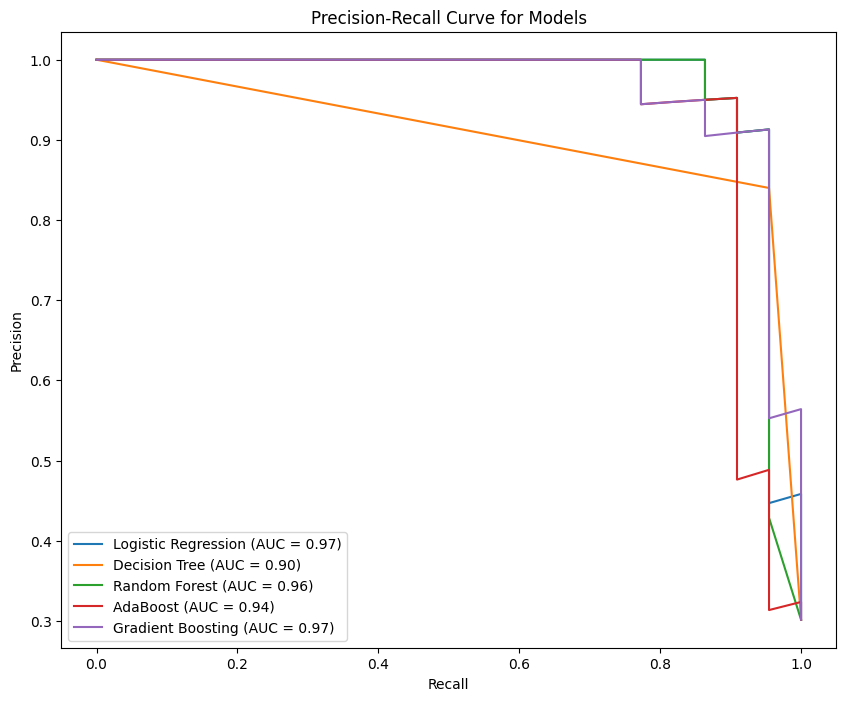

In [42]:
from sklearn.metrics import precision_recall_curve, auc


def build_models_pr_curve(x_train, x_test, y_train, y_test):
  models = [lg_model, dt_model, rf_model, ab_model, gb_model]
  model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting']
  plt.figure(figsize=(10, 8))
  for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label = f'{name} (AUC = {pr_auc:.2f})')


  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title("Precision-Recall Curve for Models")
  plt.legend(loc = 'lower left')
  plt.show()

build_models_pr_curve(X_train, X_test, y_train, y_test)